# Important note
When we are using an index that should be refering to the target index. So the time and weather of the target will be used asx input, historical data, i.e. the previous day/week/year are all determine in relation with the current target's index/time.

### testing data structure and folding

In [79]:
import numpy as np
from itertools import product

class Point:
    def __init__(self,value):
        self.value = value
        
    def __repr__(self):
        return str(self.value)
    
    def __str__(self):
        self.__repr__()
    
    

# note the Point class is used to save data in a certain shape without reshaping the coordinate values too    
def generate_mock_data(shape):
    # dynamically create flat_list give the shape
    flat_list = list(map(lambda x: Point(x),product(*list(map(lambda x: range(x), shape)))))                    


    flat_arr = np.array(flat_list)
    arr = np.reshape(flat_arr,newshape=shape)
    return arr    

In [88]:

# use as index testing


# todo add c dim
shape = n,c,h,w = 11,1,5,3
mock_data = generate_mock_data((3,))
mock_data

array([(0,), (1,), (2,)], dtype=object)

In [84]:
t,c,y,x = 3,0,2,1

index = np.ravel_multi_index(multi_index=(t,c,y,x), dims=shape)
mock_data.ravel()[index]

(3, 0, 2, 1)

In [2]:
import numpy as np
from dataloaders.batch_loader import BatchLoader
from datasets.flat_dataset import FlatDataset
from utils.preprocessing import Shaper, MinMaxScaler, minmax_scale

In [3]:
N,C,H,W = (1460, 1, 47, 33)
De = 37 # number of demographic vectors
St = 512 # number of street view vectors
We = 46  # number of weather vectors
Ti = 46  # number of time vectors

mock_crime_feature_indices = np.ones((C,))
mock_crime_types_grids = np.ones((N,C,H,W))
mock_targets = np.random.binomial(1,0.1,(N,1,H,W))
mock_crime_grids = np.ones((N,1,H,W))
mock_demog_grid = np.ones((1, De, H, W))
mock_street_grid = np.ones((1, St, H, W))
mock_time_vectors = np.ones((N+1, Ti))
mock_weather_vectors = np.ones((N, We))
mock_x_range = np.arange(W)
mock_y_range = np.arange(H)
mock_t_range = np.arange(N)

mock_flat_dataset =  FlatDataset(
            crimes=mock_crime_types_grids,
            targets=mock_targets,
            total_crimes=tst_total_crimes,
            t_range=tst_t_range,  # t_range is matched to the target index
            time_vectors=tst_time_vectors,
            weather_vectors=tst_weather_vectors,
            demog_grid=self.demog_grid,
            street_grid=self.street_grid,
            seq_len=self.seq_len,
            shaper=self.shaper,
        )

NameError: name 'tst_total_crimes' is not defined

for all loaders we will have a list of target indices - given a group elements we should produce a group of  vector - (seq_len, batch, input_size) for the 

In [129]:
class Animal:
    a = 7
    
    
    def __init__(self, name):
        self.name = name
        print("super called")
        
    def __repr__(self):
        s = ""
        for k in self.__dict__.keys():
            s = "".join(self.__dict__[k])
            print(self.__dict__)
        return s          
    
class Dog(Animal):   
    def __init__(self, name):
        print("child")
#         super(Dog, self).__init__()

In [130]:
a = Animal("jon")
d = Dog("spot")

super called
child


In [17]:
index  = slice(1,40,3)
index = 5

if isinstance(index, slice):
    start, stop, step = index.start, index.stop, index.step
else:        
    start, stop, step = index, index + 1, 1
    
for i in range(start, stop, step):
    print(i)


5


In [5]:
data_shape = t_size,l_size,c_size = 200, 6, 4 # where c_size is the number of channels/features per data point
grid_shape = t_size,l_size
batch_size = 13
seq_len = 5

max_index = t_size * l_size
min_index = seq_len * l_size
    
indices = np.arange(min_index,min_index+batch_size)

offset = np.ones(data_shape) * np.arange(l_size).reshape(1,-1,1)
data = np.ones(data_shape) * np.arange(t_size).reshape(-1,1,1) + offset


# what if we lap
t_indices, l_indices = np.unravel_index(indices,grid_shape)
print(f"t_indices: {t_indices}")
print(f"l_indices: {l_indices}")

stack = []
for index in indices:
    t_index, l_index = np.unravel_index(index,grid_shape)
    stack.append(data[t_index-seq_len:t_index, l_index]) 
    print(np.shape(data[t_index-seq_len:t_index, l_index]))
    
r = np.stack(stack)
print(np.shape(r))
r

t_indices: [5 5 5 5 5 5 6 6 6 6 6 6 7]
l_indices: [0 1 2 3 4 5 0 1 2 3 4 5 0]
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(13, 5, 4)


array([[[ 0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.]],

       [[ 1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.]],

       [[ 2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.]],

       [[ 3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.]],

       [[ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.]],

       [[ 5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.],
        [ 9.,  9.,  9.,  9.]],

       [[ 1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.]

In [103]:
a = 7
b = 5

print(a,b)
a = a^b
b = a^b
a = a^b

print(a,b)

7 5
5 7


In [90]:
# offset = np.ones(data_shape) * np.arange(l_size).reshape(1,-1,1)
data = np.ones(data_shape) * np.arange(t_size).reshape(-1,1,1) 
data.shape

(200, 6, 4)

# Todo `AUC` over time and if re-training is needed

# Sequenced RNN

In [2]:
import pandas as pd
import numpy as np
from pprint import pprint
import os
import logging as log
from pprint import pprint

In [3]:

# data_dim_strs = [
#     "T12H-X850M-Y880M/",
#     "T1H-X1700M-Y1760M/",
#     "T24H-X425M-Y440M/",
#     "T24H-X850M-Y880M/",
#     "T24H-X85M-Y110M/",
#     "T3H-X850M-Y880M/",
#     "T4H-X850M-Y880M/",
#     "T6H-X850M-Y880M/"
# ]

data_dim_strs = os.listdir("./data/processed")[1:]
pprint(data_dim_strs)

['T6H-X850M-Y880M',
 'T24H-X85M-Y110M',
 'T24H-X850M-Y880M',
 'T24H-X425M-Y440M',
 'T12H-X850M-Y880M',
 'T1H-X1700M-Y1760M',
 'T3H-X850M-Y880M']


In [ ]:
for data_dim_str in data_dim_strs:
    print(data_dim_str)
    data_path = f"./data/processed/{data_dim_str}/"
    zip_file = np.load(data_path + "generated_data.npz")

    # print info on the read data
    log.info("Data shapes of files in generated_data.npz")
    for k in zip_file.keys():
        try:
            v = zip_file[k]
            print(f"\t{k} shape {np.shape(v)}")
        except ValueError as e:
            print(f"Issue loading {k} ->{e}")
            
        
    t_range = pd.read_pickle(data_path + "t_range.pkl")
    print(f"\tt_range shape {np.shape(t_range)}")

T6H-X850M-Y880M
	crime_feature_indices shape (11,)
	crime_types_grids shape (1460, 11, 47, 33)
	crime_grids shape (1460, 1, 47, 33)
	demog_grid shape (1, 37, 47, 33)
	street_grid shape (1, 512, 47, 33)
	time_vectors shape (1461, 46)
	weather_vectors shape (1460, 11)
	x_range shape (33,)
	y_range shape (47,)
	t_range shape (1461,)
T24H-X85M-Y110M
	crime_feature_indices shape (11,)


In [ ]:
for k in zip_file.keys():
    print(k)

In [40]:
# drop weather fo now and just check what you can get
# or cap everything to the length of the weather
# or cap
from datasets.grid_dataset import GridDataGroup
from datasets.flat_dataset import FlatDataGroup
from utils.plots import im
import pandas as pd
from pprint import pprint
import numpy as np
from utils.configs import BaseConf
import matplotlib.pyplot as plt
from models.baseline_models import ExponentialMovingAverage, UniformMovingAverage,\
                                   TriangularMovingAverage, HistoricAverage
from utils.metrics import CellPlotter

In [41]:
data_dim_str = "T24H-X850M-Y880M"
data_path = f"./data/processed/{data_dim_str}/"


conf_dict = {
    "seed": 3,
    "resume": False,
    "early_stopping": False,
    "use_cuda": False,
    "val_ratio": 0.1,
    "tst_ratio": 0.2,
    "sub_sample_train_set": True,
    "sub_sample_validation_set": True,
    "sub_sample_test_set": False,
    "flatten_grid": True,
    "lr": 1e-3,
    "weight_decay": 1e-8,
    "max_epochs": 10,
    "batch_size": 64,
    "dropout": 0,
    "shuffle": False,
    "num_workers": 6,
    "seq_len": 0
}


conf = BaseConf(conf_dict=conf_dict)

data_group = FlatDataGroup(data_path=data_path, conf=conf)

In [ ]:
data_group.testing_set
# get evaluation of each time step - like evaluate sub-test sets per time and see if the actual accuracy dies off.



# Try simple crime info only training loop
### Check other training loops - already have good examples with checkpointing set up

## Useful plotting - when it comes to the per cell level predictions

In [11]:
og_crimes = data_group.crime_scaler.inverse_transform(data_group.crimes)
og_crimes = np.exp2(og_crimes) - 1

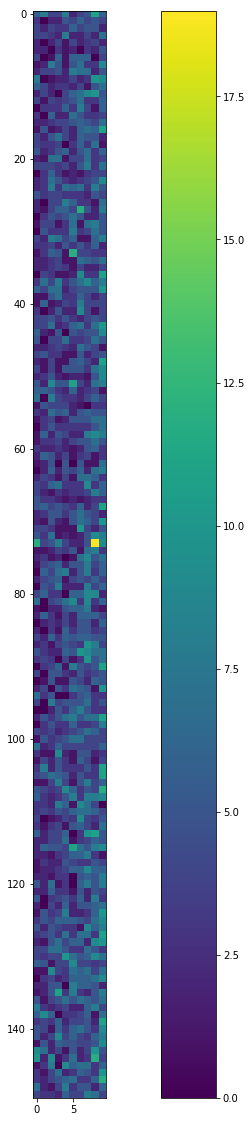

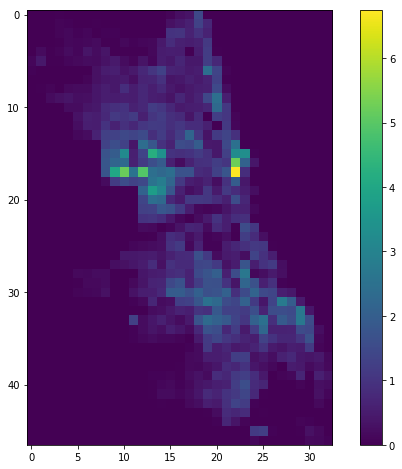

In [12]:
top_k = 10
last_n_steps = 150
crimes = og_crimes[:,0]
s = data_group.shaper.squeeze(crimes)
indices = np.argsort(s.mean(0))
sorted_s = s[:last_n_steps,indices[-top_k:]]
plt.figure(figsize=(20,20))
plt.imshow(sorted_s,cmap='viridis')
plt.colorbar()
plt.show()

im(crimes.mean(0))

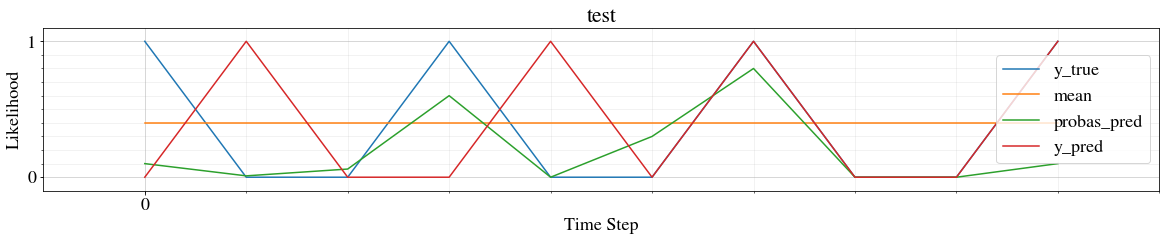

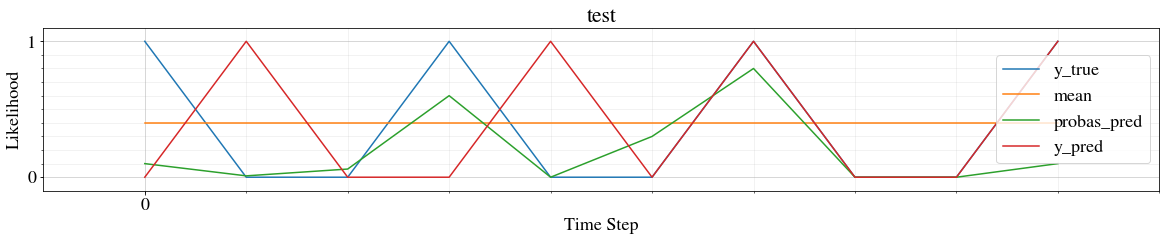

In [15]:
for i in range(2):
    data = sorted_s[:,-(i+1)]
    ones = np.copy(data)
    ones[ones == -1]
    mean = np.ones_like(data)*np.mean(data)
    cell_plotter = CellPlotter("test")
    cell_plotter.plot_predictions(y_true=[1,0,0,1,0,0,1,0,0,1],
                                  y_pred=[0,1,0,0,1,0,1,0,0,1],
                                  probas_pred=[.1,.01,.06,.6,0,.3,.8,0,0,.1])
    cell_plotter.show()